#  Finding Heavy Traffic Indicators on I-94

In this project, I will analyze the dataset about the westbound traffic on the I-94 Interstate highway with the aim of determining the cause of heavy traffic on the highway, whether is is caused by the weather, a particular time of the day or week and other possible indicators

In [2]:
import pandas as pd

traffic_vol = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic_vol.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
traffic_vol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Analyzing Traffic Volume


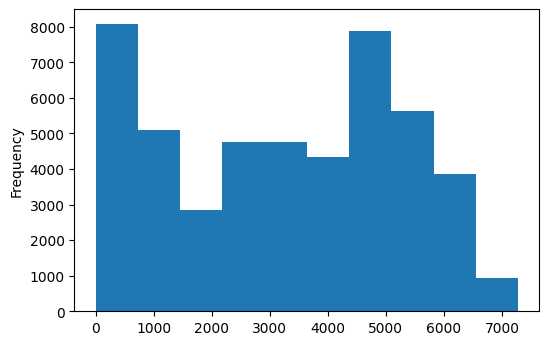

In [4]:

import matplotlib.pyplot as plt
%matplotlib inline
traffic_vol['traffic_volume'].plot.hist()
plt.show()


In [5]:
traffic_vol['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The hourly traffic volume ranged from 0 to 7,280 cars between 2012-10-02 and 2018-09-30, with an average of 3,260 cars.

Only 1,193 cars or fewer passed the station every hour in about 25% of the time; this is probably true at night or during road construction. But about 75% of the time, there was four times as much traffic (4,933 cars or more).


Due to this observation, we can now compare daytime and nighttime data, which is an interesting direction for our analysis.

## Traffic Volume: Day vs. Night

I'll divide the dataset into two parts:
*  Daytime data: hours from 7 AM to 7 PM (12 hours)
*  Nighttime data: hours from 7 PM to 7 AM (12 hours)


In [6]:
traffic_vol['date_time'] = pd.to_datetime(traffic_vol['date_time'])

day = traffic_vol.copy()[(traffic_vol['date_time'].dt.hour >= 7) & (traffic_vol['date_time'].dt.hour < 19)]
print(day.shape)

night = traffic_vol.copy()[(traffic_vol['date_time'].dt.hour >= 19) | (traffic_vol['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


## Traffic Volume: Day vs. Night (II)


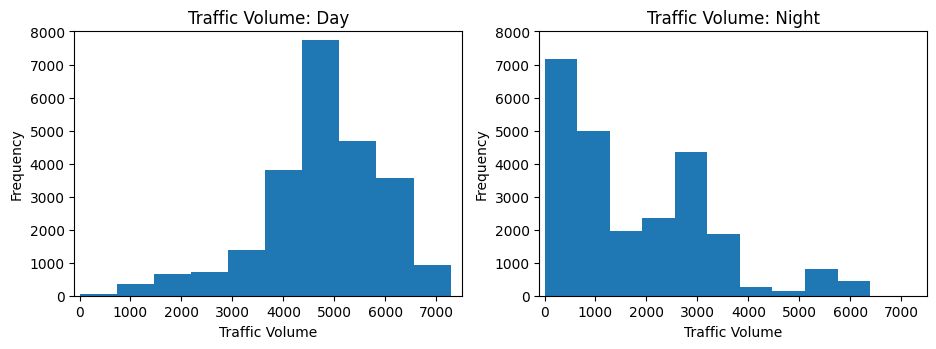

In [7]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [8]:
print(day['traffic_volume'].describe())
print("\n")
print(night['traffic_volume'].describe())

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64


count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


Traffic during the night time is generally low and the point is to find indicators of heavy traffic, so I'll only look at daytime data from now on.

## Time Indicators


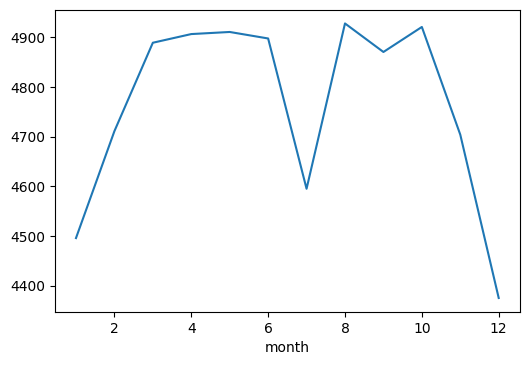

In [9]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()


In general, the traffic appears to be heavier in the warm months (March–October) and lighter in the cold months (November–February), with one intriguing exception: July.

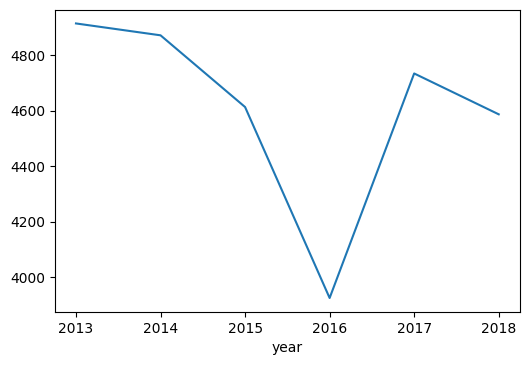

In [10]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

Similar to other warm months, July typically sees a lot of traffic. The only exception that stands out is 2016, when traffic volume significantly decreased. Road construction could be one of the causes.

We can draw the provisional conclusion that traffic is generally heavier during the warm months than it is during the cold ones. In a warm month, you can confidently predict a traffic volume of close to 5,000 cars per hour during the day.

## Time Indicators (II)

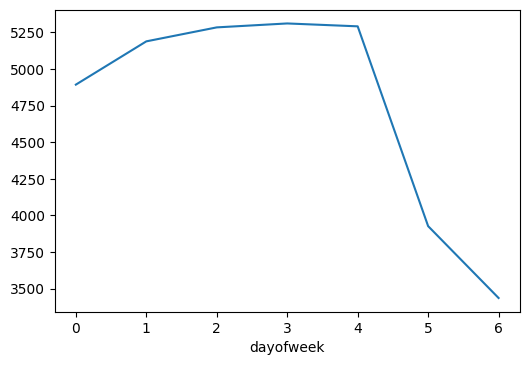

In [11]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
plt.show()

On business days, there is significantly more traffic (Monday – Friday). We mostly see values over 5,000 on business days, excluding Monday. Weekend traffic is lower, with values under 4,000 cars.

## Time Indicators (III)

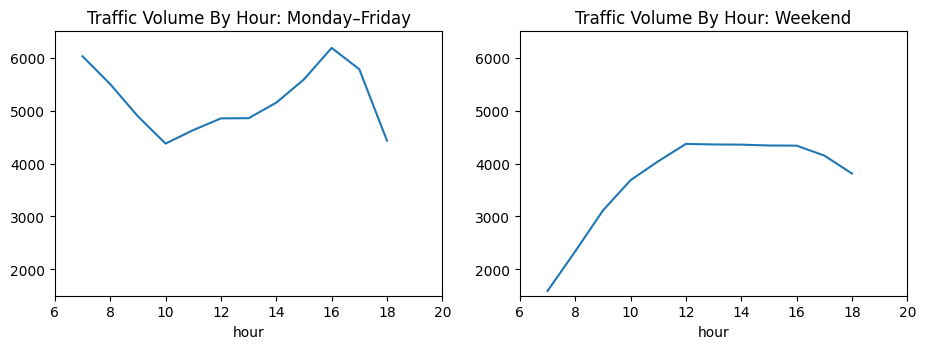

In [12]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 = Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()


plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

When compared to weekends, business days typically have higher traffic volumes at every hour of the day. The busiest times are between 7 and 16 because this is when most people leave for work and return. At peak times, there are over 6,000 cars on the road.

## Weather Types

Weather is yet another factor that may indicate heavy traffic. Let's examine the correleation

In [13]:
day.corr()['traffic_volume']


temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

With a value of just +0.13, temperature exhibits the strongest correlation.

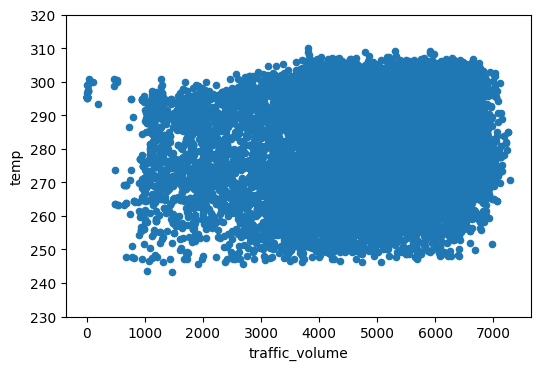

In [14]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320) 
plt.show()


We can infer from the graph above that temperature is not a reliable predictor of heavy traffic.